In [22]:
# Computation libraries
import numpy as np
import matplotlib.pyplot as plt

# Import non linear dataset
from nnfs.datasets import spiral_data

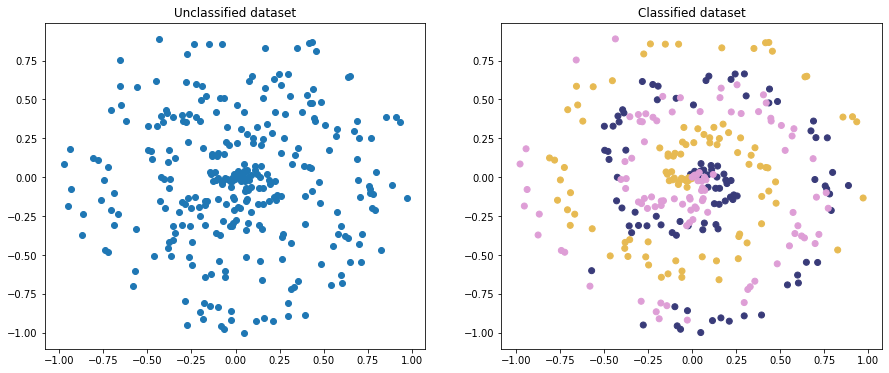

In [23]:
# Hard classification problem for linear models
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Generate dataset
X, y = spiral_data(samples=100, classes=3)

# Scatter plots
axes[0].scatter(X[:, 0], X[:, 1])
axes[1].scatter(X[:, 0], X[:, 1], c=y, cmap="tab20b")

# Plot stuff
axes[0].set(title='Unclassified dataset')
axes[1].set(title='Classified dataset')

plt.show()

In [24]:
# Import deeplib
from deeplib.layer import Dense
from deeplib.activation import ReLU, Softmax
from deeplib.loss import CategoricalCrossEntropy

In [25]:
# Generate dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Dense(2, 3)
activation1 = ReLU()
activation2 = Softmax()
loss_func = CategoricalCrossEntropy()

# Forward pass X
dense1.forward(X)
activation1.forward(dense1.output)
activation2.forward(activation1.output)
loss = loss_func.calculate(activation2.output, y)

# Computa accuracy
predicitions = np.argmax(activation2.output, axis=1)

# If case of one hot encoding
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)

# Compute accuracy
accuracy = np.mean(predicitions == y)

# Print softmax output
print(activation2.output[:5])

# Print Loss
print('Loss:', loss)
print('Accuracy:', accuracy)

[[0.33333334 0.33333334 0.33333334]
 [0.33337235 0.33332118 0.33330646]
 [0.3334103  0.33331683 0.3332729 ]
 [0.333441   0.3333268  0.33323222]
 [0.33348748 0.33329937 0.33321318]]
Loss: 1.0986582
Accuracy: 0.3233333333333333
